<a href="https://colab.research.google.com/github/CJL-INVEST/invest/blob/main/k_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bt
!pip install finterstellar
!pip install quantstats
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import bt
import finterstellar as fs
import quantstats as qs
import pandas as pd
from datetime import datetime, timedelta
import math
import FinanceDataReader as fdr
%matplotlib inline

In [ ]:
class K_AllWeather:

    def __init__(self, start_day, end_day):
        self.start_day = start_day
        self.end_day = end_day

        # RU: Risky Universe, CU: Cash Universe
        self.__RU = ['360750', '361580', '319640'] # invest 25% per each item and rebalance every year
        self.__RU_Name = ['Tiger미국S&P', 'KBSTAR200TR', 'TIGER골드선물H']
        self.__CU = ['148070', '305080', '272580'] # choose one of them according to the policy and rebalance every month
        self.__CU_Name = ['KOSEF국고채10년', 'TIGER미국채10년선물','TIGER단기채권액티브']

        self.__SLIPPAGE = 0.015
        self.__TRANSACTION_FEE = 0.00015

        self.__df_CU = None
        self.__df_RU = None
        self.__df_RCU = None

    def get_CU_data(self):
        return self.__df_CU
  
    def get_RU_data(self):
        return self.__df_RU

    def fetch_CU_data(self):
        self.__df_CU = pd.DataFrame(columns=self.__CU_Name)
        idx = 0
        for ticker in self.__CU:
            ticker_name = self.__CU_Name[idx]
            self.__df_CU[ticker_name] = fdr.DataReader(ticker, self.start_day - timedelta(days=365), self.end_day)['Close']
            idx = idx + 1
        self.__df_CU = self.__df_CU.dropna()

    def fetch_RU_data(self):
        self.__df_RU = pd.DataFrame(columns=self.__RU_Name)
        idx = 0
        for ticker in self.__RU:
            ticker_name = self.__RU_Name[idx]
            self.__df_RU[ticker_name] = fdr.DataReader(ticker, self.start_day - timedelta(days=365), self.end_day)['Close']
            idx = idx + 1
        self.__df_RU = self.__df_RU.dropna()

    def get_RCU_data(self):
        self.__df_RCU = pd.concat([self.__df_RU[self.__RU_Name], self.__df_CU[self.__CU_Name]], axis=1)
        self.__df_RCU = self.__df_RCU.dropna()
        return self.__df_RCU

In [ ]:
#if __name__ == "__main__":
start_day = datetime(2020,8,21)
end_day = datetime.now()
kw = K_AllWeather(start_day, end_day)
kw.fetch_RU_data()
kw.fetch_CU_data()

 

In [ ]:
df_ru = kw.get_RU_data()
df_ru


,Tiger미국S&P,KBSTAR200TR,TIGER골드선물H
Date,,,
2020-08-21,9972,15340.0,14315
2020-08-24,10061,15505.0,14265
2020-08-25,10136,15705.0,14235
2020-08-26,10146,15705.0,14135
2020-08-27,10210,15575.0,14300
...,...,...,...
2022-07-06,12535,15920.0,12675
2022-07-07,12615,16215.0,12515
2022-07-08,12715,16325.0,12505


In [ ]:
df_cu = kw.get_CU_data()
df_cu


,KOSEF국고채10년,TIGER미국채10년선물,TIGER단기채권액티브
Date,,,
2019-08-22,124444,11980,49271
2019-08-23,124171,11965,49271
2019-08-26,124995,12160,49271
2019-08-27,124670,12080,49276
2019-08-28,124410,12105,49276
...,...,...,...
2022-07-06,111325,12200,50525
2022-07-07,111295,12030,50540
2022-07-08,110550,12010,50530


In [ ]:
df_rcu = kw.get_RCU_data()
df_rcu

,Tiger미국S&P,KBSTAR200TR,TIGER골드선물H,KOSEF국고채10년,TIGER미국채10년선물,TIGER단기채권액티브
Date,,,,,,
2020-08-21,9972.0,15340.0,14315.0,125094,12640,49921
2020-08-24,10061.0,15505.0,14265.0,125295,12705,49916
2020-08-25,10136.0,15705.0,14235.0,125246,12640,49921
2020-08-26,10146.0,15705.0,14135.0,125098,12605,49921
2020-08-27,10210.0,15575.0,14300.0,124868,12620,49921
...,...,...,...,...,...,...
2022-07-06,12535.0,15920.0,12675.0,111325,12200,50525
2022-07-07,12615.0,16215.0,12515.0,111295,12030,50540
2022-07-08,12715.0,16325.0,12505.0,110550,12010,50530


In [ ]:
weight_middle = pd.Series([0.175, 0.175, 0.15, 0.175, 0.175, 0.15],index = df_rcu.columns)
weighSpecifiedAlgo_middle = bt.algos.WeighSpecified(**weight_middle)

weight_passive = pd.Series([0.125, 0.125, 0.05, 0.2, 0.2, 0.3],index = df_rcu.columns)
weighSpecifiedAlgo_passive = bt.algos.WeighSpecified(**weight_passive)

weight_agressive = pd.Series([0.25, 0.25, 0.20, 0.10, 0.10, 0.10],index = df_rcu.columns)
weighSpecifiedAlgo_agressive = bt.algos.WeighSpecified(**weight_agressive)

In [ ]:
initial_capital = 100000.00

In [ ]:
st_k_weather_middle = bt.Strategy('K_weather_middle',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectAll(),
                      weighSpecifiedAlgo_middle,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_middle = bt.Backtest(st_k_weather_middle, df_rcu)

st_k_weather_passive = bt.Strategy('K_weather_passive',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectAll(),
                      weighSpecifiedAlgo_passive,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_passive = bt.Backtest(st_k_weather_passive, df_rcu)

st_k_weather_agressive = bt.Strategy('K_weather_agressive',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectAll(),
                      weighSpecifiedAlgo_agressive,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_agressive = bt.Backtest(st_k_weather_agressive, df_rcu, initial_capital=initial_capital)

In [ ]:
ret = bt.run(bt_k_weather_passive, bt_k_weather_middle, bt_k_weather_agressive )

In [ ]:
ret.display()

Stat                 K_weather_passive    K_weather_middle    K_weather_agressive
-------------------  -------------------  ------------------  ---------------------
Start                2020-08-20           2020-08-20          2020-08-20
End                  2022-07-12           2022-07-12          2022-07-12
Risk-free rate       0.00%                0.00%               0.00%

Total Return         1.91%                1.32%               4.31%
Daily Sharpe         0.31                 0.16                0.41
Daily Sortino        0.52                 0.26                0.66
CAGR                 1.01%                0.70%               2.25%
Max Drawdown         -5.88%               -7.74%              -6.55%
Calmar Ratio         0.17                 0.09                0.34

MTD                  0.69%                0.21%               -0.11%
3m                   -1.51%               -4.07%              -5.38%
6m                   -4.02%               -6.44%              -5.95%
YTD  

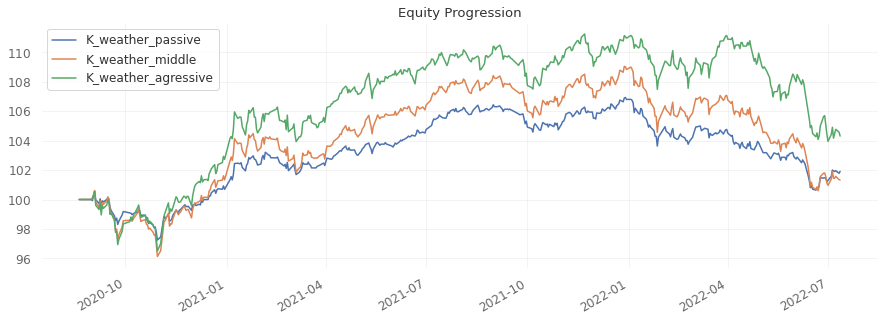

In [ ]:
ret.plot()

[Performance Metrics]



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2020-08-21  2020-08-21
End Period          2022-07-12  2022-07-12
Risk-Free Rate      0.0%        0.0%
Time in Market      99.0%       99.0%

Cumulative Return   1.32%       4.31%
CAGR﹪              0.7%        2.26%

Sharpe              0.16        0.41
Prob. Sharpe Ratio  58.71%      71.25%
Sortino             0.22        0.57
Sortino/√2          0.16        0.4
Omega               1.03        1.03

Max Drawdown        -7.74%      -6.55%
Longest DD Days     195         231

Gain/Pain Ratio     0.03        0.07
Gain/Pain (1M)      0.1         0.32

Payoff Ratio        0.88        0.9
Profit Factor       1.03        1.07
Common Sense Ratio  0.95        0.99
CPC Index           0.48        0.52
Tail Ratio          0.93        0.93
Outlier Win Ratio   3.03        2.64
Outlier Loss Ratio  3.31        2.93

MTD                 0.21%       -0.11%
3M                  -4.35%      -5.61%
6

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


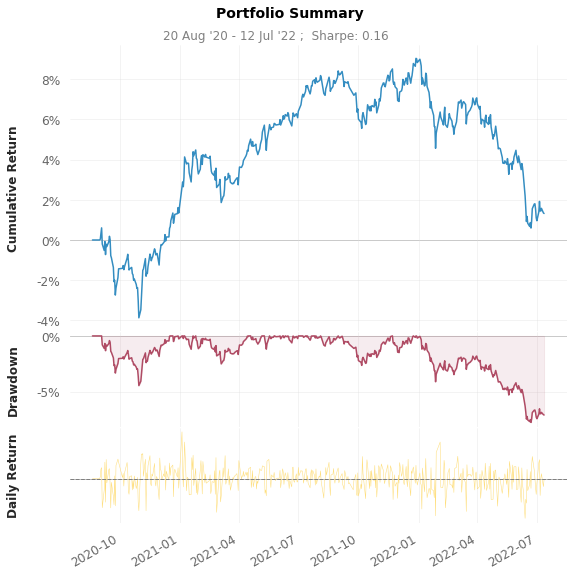

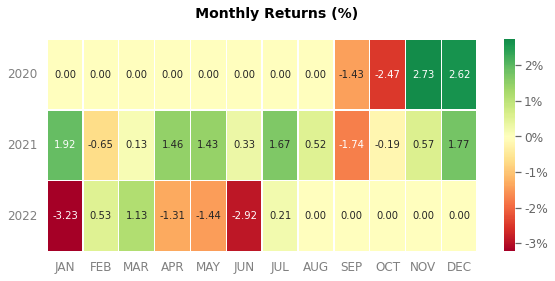

In [60]:
qs.reports.basic(ret.prices['K_weather_middle'].to_returns().dropna(), ret.prices['K_weather_agressive'].to_returns().dropna())

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

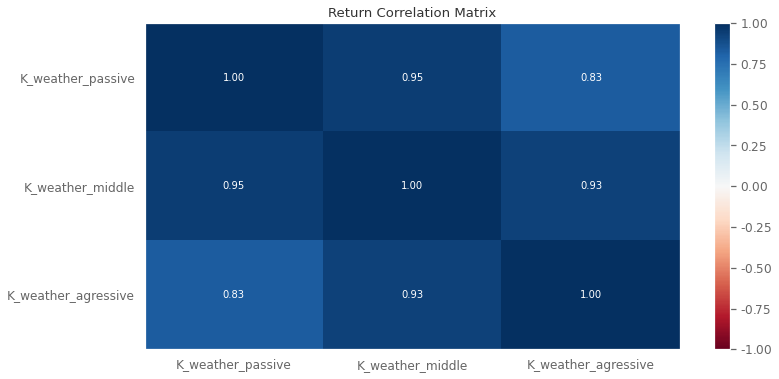

In [67]:
ret.plot_correlation()

Text(0.5, 0.98, 'Return Histogram Matrix')

<Figure size 432x288 with 0 Axes>

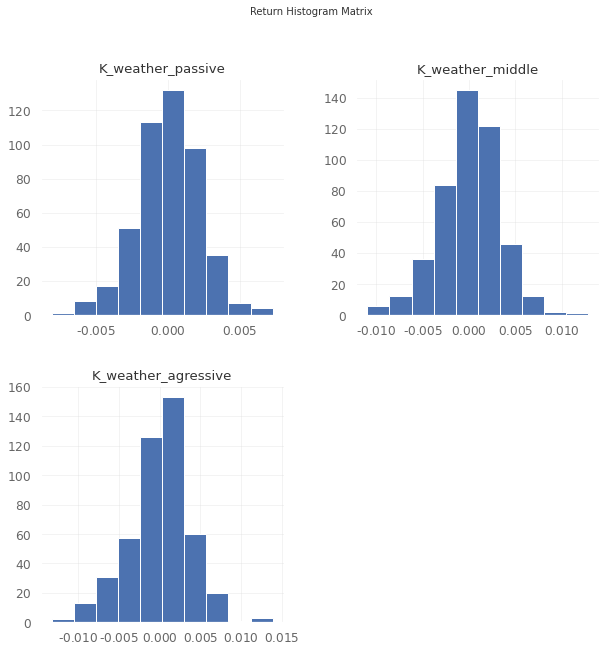

In [71]:
ret.plot_histograms()

In [78]:
ret['K_weather_passive'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2020   0      0      0      0      0      0      0      0     -0.81  -1.96   2.08   1.43   0.69
  2021   1.64  -0.37   0.34   0.67   0.62   0.85   1.37   0.45  -1.04  -0.56   0.75   1.21   6.06
  2022  -2.4   -0.01   0.51  -0.86  -0.91  -1.65   0.69   0      0      0      0      0     -4.57


In [79]:
ret['K_weather_middle'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2020   0      0      0      0      0      0      0      0     -1.43  -2.47   2.73   2.62   1.34
  2021   1.92  -0.65   0.13   1.46   1.43   0.33   1.67   0.52  -1.74  -0.19   0.57   1.77   7.39
  2022  -3.23   0.53   1.13  -1.31  -1.44  -2.92   0.21   0      0      0      0      0     -6.9


In [80]:
ret['K_weather_agressive'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2020   0      0      0      0      0      0      0      0     -1.66  -1.87    3.2   3.15   2.73
  2021   1.75   0.08   0.61   1.8    1.2    0.35   0.75   0.71  -1.66   0.52   -0.1   1.76   8.01
  2022  -2.55   0.42   2.36  -1.08  -1.41  -3.65  -0.11   0      0      0       0     0     -5.99
